# TSP problem

Find the shortest distance for a salesperson to visit all locations given by list given below. The distance between each location is calculated using the so-called Manhattan distance:

$$
D_{ij} = \|x_i - x_j\| + \|y_i - y_j\|
$$













In [25]:
import pandas as pd

df_master = pd.read_csv('c101.txt', header = None, skiprows=1,sep = '\s+')
df_master.columns = ['ITEM_ID', 'X_CORR', 'Y_CORR']

In [26]:
df_master

,ITEM_ID,X_CORR,Y_CORR
0,0,40,50
1,1,45,68
2,2,45,70
3,3,42,66
4,4,42,68
...,...,...,...
96,96,60,80
97,97,60,85
98,98,58,75
99,99,55,80


In [27]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import pulp
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value
import networkx as nx

In [28]:
d=distance_matrix(df_master[['X_CORR', 'Y_CORR']].values, df_master[['X_CORR', 'Y_CORR']].values, p=1)  # manhattan distance

In [29]:
model=LpProblem(name='tsp_manhattan', sense=LpMinimize)

In [30]:
n_point=len(df_master)
x=LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point) if i!=j), cat='Binary')

In [31]:
# constraint
for i in range(n_point):
    model+=lpSum(x[j, i] for j in range(n_point) if j!=i) == 1  # incoming edge
    model+=lpSum(x[i, j] for j in range(n_point) if j!=i) == 1  # outgoing edge

In [32]:
# objective function
model+=lpSum(x[i, j]*d[i][j] for i in range(n_point) for j in range(n_point) if i!=j)

In [33]:
model.solve()
LpStatus[model.status]

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/8a1b65f8fb9640f086fa7af6c2b5decc-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/8a1b65f8fb9640f086fa7af6c2b5decc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 207 COLUMNS
At line 50708 RHS
At line 50911 BOUNDS
At line 61012 ENDATA
Problem MODEL has 202 rows, 10100 columns and 20200 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 352 - 0.04 seconds
Cgl0004I processed model has 202 rows, 10100 columns (10100 integer (10100 of which binary)) and 20200 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 352
Cbc0038I Before mini branch and bound, 10100 integers at bound fixed and 0 continuous
Cbc0038I 

'Optimal'

In [34]:
model.objective.value()

352.0

In [35]:
from ast import literal_eval as make_tuple

routes=[]
for var in model.variables():
    if var.value() == 1:
        #print(var.name, var.value())
        a=var.name.replace('_', '')
        routes.append(make_tuple(a[1:]))
print(routes)

[(0, 20), (1, 2), (10, 11), (100, 97), (11, 10), (12, 14), (13, 17), (14, 16), (15, 19), (16, 12), (17, 18), (18, 13), (19, 15), (2, 1), (20, 0), (21, 22), (22, 21), (23, 26), (24, 29), (25, 24), (26, 23), (27, 25), (28, 30), (29, 27), (3, 4), (30, 28), (31, 35), (32, 33), (33, 32), (34, 36), (35, 31), (36, 39), (37, 38), (38, 37), (39, 34), (4, 3), (40, 41), (41, 40), (42, 46), (43, 47), (44, 48), (45, 44), (46, 42), (47, 43), (48, 45), (49, 52), (5, 75), (50, 51), (51, 50), (52, 49), (53, 56), (54, 55), (55, 54), (56, 53), (57, 59), (58, 60), (59, 57), (6, 7), (60, 58), (61, 72), (62, 74), (63, 67), (64, 68), (65, 63), (66, 69), (67, 65), (68, 64), (69, 66), (7, 6), (70, 73), (71, 76), (72, 61), (73, 70), (74, 62), (75, 5), (76, 71), (77, 80), (78, 81), (79, 77), (8, 9), (80, 79), (81, 78), (82, 83), (83, 82), (84, 85), (85, 84), (86, 87), (87, 86), (88, 89), (89, 88), (9, 8), (90, 91), (91, 90), (92, 93), (93, 94), (94, 92), (95, 96), (96, 95), (97, 100), (98, 99), (99, 98)]


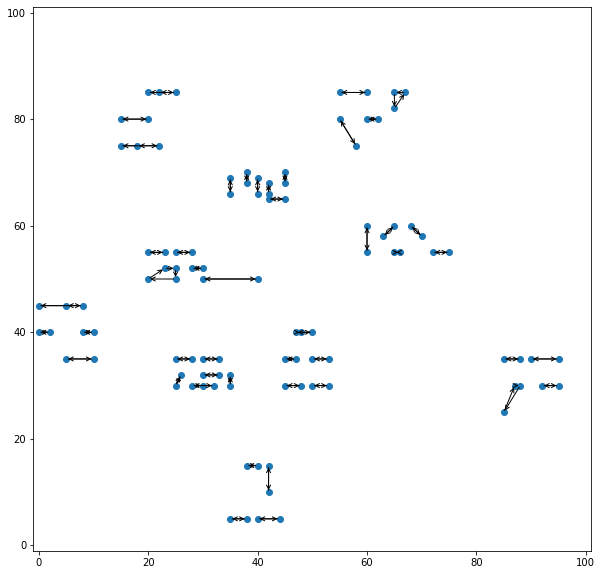

In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(df_master['X_CORR'], df_master['Y_CORR'])
        
plt.xlim([-1, 101])
plt.ylim([-1, 101])

arrowprops=dict(arrowstyle='->')
for i, j in routes:
    #print(i, j, df_master.iloc[j][0], df_master.iloc[j][1])
    plt.annotate('', xy=[df_master.iloc[j]['X_CORR'], df_master.iloc[j]['Y_CORR']], xytext=[df_master.iloc[i]['X_CORR'], df_master.iloc[i]['Y_CORR']], arrowprops=arrowprops)

plt.show()

In [37]:
G=nx.Graph()
G.add_nodes_from(range(n_point))
for e in routes:
    G.add_edge(e[0], e[1])
print('Number of CC = ', nx.number_connected_components(G))

Number of CC =  46


has subgraph
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/dabb220e5ca0477d8efde073c6016867-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/dabb220e5ca0477d8efde073c6016867-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 253 COLUMNS
At line 50884 RHS
At line 51133 BOUNDS
At line 61234 ENDATA
Problem MODEL has 248 rows, 10100 columns and 20330 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 394 - 0.04 seconds
Cgl0004I processed model has 248 rows, 10100 columns (10100 integer (10100 of which binary)) and 20330 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 2.22045e-16
Cbc0038I Solution found of 394
Cbc0038I Before mini branch and bound, 10100 integers at bound fixed and

Cbc0038I Pass  21: suminf.   28.59979 (70) obj. 505.4 iterations 91
Cbc0038I Pass  22: suminf.   28.59979 (70) obj. 505.4 iterations 10
Cbc0038I Pass  23: suminf.   28.59979 (70) obj. 505.4 iterations 9
Cbc0038I Pass  24: suminf.   28.59979 (70) obj. 505.4 iterations 11
Cbc0038I Pass  25: suminf.   27.59979 (68) obj. 505.4 iterations 13
Cbc0038I Pass  26: suminf.   27.59979 (68) obj. 505.4 iterations 8
Cbc0038I Pass  27: suminf.   27.59979 (68) obj. 505.4 iterations 8
Cbc0038I Pass  28: suminf.   27.59979 (68) obj. 505.4 iterations 9
Cbc0038I Pass  29: suminf.   27.59979 (68) obj. 505.4 iterations 9
Cbc0038I Pass  30: suminf.   27.59979 (68) obj. 505.4 iterations 9
Cbc0038I Pass  31: suminf.   27.59979 (68) obj. 505.4 iterations 4
Cbc0038I Pass  32: suminf.   27.59979 (68) obj. 505.4 iterations 3
Cbc0038I Pass  33: suminf.   23.53341 (63) obj. 505.4 iterations 37
Cbc0038I Pass  34: suminf.   21.79982 (50) obj. 505.4 iterations 30
Cbc0038I Pass  35: suminf.   21.79982 (50) obj. 505.4 it

Cbc0038I Pass  20: suminf.   21.28563 (65) obj. 531 iterations 21
Cbc0038I Pass  21: suminf.   20.99988 (61) obj. 531 iterations 21
Cbc0038I Pass  22: suminf.   20.99988 (61) obj. 531 iterations 9
Cbc0038I Pass  23: suminf.   20.99988 (61) obj. 531 iterations 10
Cbc0038I Pass  24: suminf.   20.99988 (61) obj. 531 iterations 15
Cbc0038I Pass  25: suminf.   20.99988 (61) obj. 531 iterations 27
Cbc0038I Pass  26: suminf.   20.99988 (61) obj. 531 iterations 1
Cbc0038I Pass  27: suminf.   20.99988 (61) obj. 531 iterations 7
Cbc0038I Pass  28: suminf.   21.49985 (61) obj. 531 iterations 12
Cbc0038I Pass  29: suminf.   20.99988 (61) obj. 531 iterations 21
Cbc0038I Pass  30: suminf.   20.99988 (61) obj. 531 iterations 10
Cbc0038I Pass  31: suminf.   20.99988 (61) obj. 531 iterations 11
Cbc0038I Pass  32: suminf.   21.99991 (64) obj. 531 iterations 30
Cbc0038I Pass  33: suminf.   20.33321 (54) obj. 531 iterations 26
Cbc0038I Pass  34: suminf.   20.33321 (54) obj. 531 iterations 12
Cbc0038I Pass

Cbc0038I Pass  31: suminf.   56.19972 (122) obj. 552.7 iterations 13
Cbc0038I Pass  32: suminf.   53.04940 (135) obj. 552.7 iterations 10
Cbc0038I Pass  33: suminf.   53.04940 (135) obj. 552.7 iterations 3
Cbc0038I Pass  34: suminf.   53.04940 (135) obj. 552.7 iterations 2
Cbc0038I Pass  35: suminf.   56.89979 (120) obj. 552.7 iterations 36
Cbc0038I Pass  36: suminf.   53.04940 (135) obj. 552.7 iterations 37
Cbc0038I Pass  37: suminf.   53.04940 (135) obj. 552.7 iterations 5
Cbc0038I Pass  38: suminf.   53.04940 (135) obj. 552.7 iterations 3
Cbc0038I Pass  39: suminf.   53.04940 (135) obj. 552.7 iterations 6
Cbc0038I Pass  40: suminf.   53.04940 (135) obj. 552.7 iterations 4
Cbc0038I No solution found this major pass
Cbc0038I Before mini branch and bound, 9919 integers at bound fixed and 0 continuous
Cbc0038I Full problem 295 rows 10100 columns, reduced to 55 rows 43 columns
Cbc0038I Mini branch and bound did not improve solution (0.77 seconds)
Cbc0038I After 0.77 seconds - Feasibility

Cbc0038I Mini branch and bound improved solution from 566 to 564 (0.81 seconds)
Cbc0038I Round again with cutoff of 561.2
Cbc0038I Reduced cost fixing fixed 9300 variables on major pass 4
Cbc0038I Pass  32: suminf.   24.39996 (51) obj. 561.2 iterations 9
Cbc0038I Pass  33: suminf.   22.05701 (57) obj. 561.2 iterations 124
Cbc0038I Pass  34: suminf.   22.05701 (57) obj. 561.2 iterations 8
Cbc0038I Pass  35: suminf.    9.33310 (39) obj. 561.2 iterations 34
Cbc0038I Pass  36: suminf.    9.33310 (39) obj. 561.2 iterations 28
Cbc0038I Pass  37: suminf.   15.79993 (40) obj. 561.2 iterations 85
Cbc0038I Pass  38: suminf.   15.19990 (35) obj. 561.2 iterations 41
Cbc0038I Pass  39: suminf.   15.19990 (35) obj. 561.2 iterations 7
Cbc0038I Pass  40: suminf.   14.59986 (35) obj. 561.2 iterations 19
Cbc0038I Pass  41: suminf.   14.59986 (35) obj. 561.2 iterations 4
Cbc0038I Pass  42: suminf.   14.79993 (31) obj. 561.2 iterations 17
Cbc0038I Pass  43: suminf.   14.79993 (31) obj. 561.2 iterations 32

Cbc0038I Pass  32: suminf.    4.67996 (19) obj. 572.2 iterations 62
Cbc0038I Pass  33: suminf.    5.79993 (13) obj. 572.2 iterations 64
Cbc0038I Pass  34: suminf.    1.20042 (11) obj. 572.2 iterations 26
Cbc0038I Solution found of 572
Cbc0038I Before mini branch and bound, 9802 integers at bound fixed and 0 continuous
Cbc0038I Full problem 315 rows 10100 columns, reduced to 204 rows 220 columns
Cbc0038I Mini branch and bound improved solution from 572 to 566 (1.30 seconds)
Cbc0038I Round again with cutoff of 563.8
Cbc0038I Reduced cost fixing fixed 9568 variables on major pass 5
Cbc0038I Pass  35: suminf.   69.19993 (157) obj. 563.8 iterations 60
Cbc0038I Pass  36: suminf.   24.13352 (59) obj. 563.8 iterations 136
Cbc0038I Pass  37: suminf.   20.79989 (44) obj. 563.8 iterations 36
Cbc0038I Pass  38: suminf.   18.79989 (40) obj. 563.8 iterations 33
Cbc0038I Pass  39: suminf.    6.29989 (18) obj. 563.8 iterations 20
Cbc0038I Pass  40: suminf.    6.29989 (18) obj. 563.8 iterations 9
Cbc00

Cbc0038I Pass  32: suminf.   16.29980 (37) obj. 568.6 iterations 30
Cbc0038I Pass  33: suminf.   16.29980 (37) obj. 568.6 iterations 1
Cbc0038I Pass  34: suminf.    5.30003 (15) obj. 568.6 iterations 61
Cbc0038I Pass  35: suminf.    1.20014 (4) obj. 568.6 iterations 12
Cbc0038I Solution found of 568
Cbc0038I Before mini branch and bound, 9840 integers at bound fixed and 0 continuous
Cbc0038I Full problem 318 rows 10100 columns, reduced to 174 rows 188 columns
Cbc0038I Mini branch and bound improved solution from 568 to 566 (1.37 seconds)
Cbc0038I Round again with cutoff of 564.4
Cbc0038I Reduced cost fixing fixed 9620 variables on major pass 5
Cbc0038I Pass  36: suminf.   59.29996 (126) obj. 564.4 iterations 28
Cbc0038I Pass  37: suminf.   17.69986 (50) obj. 564.4 iterations 98
Cbc0038I Pass  38: suminf.   15.49982 (41) obj. 564.4 iterations 26
Cbc0038I Pass  39: suminf.   14.49982 (39) obj. 564.4 iterations 9
Cbc0038I Pass  40: suminf.   14.49982 (39) obj. 564.4 iterations 7
Cbc0038I 

Cbc0038I Pass  20: suminf.   11.19946 (46) obj. 564.2 iterations 15
Cbc0038I Pass  21: suminf.   11.19946 (46) obj. 564.2 iterations 4
Cbc0038I Pass  22: suminf.   11.19946 (46) obj. 564.2 iterations 6
Cbc0038I Pass  23: suminf.   11.19946 (46) obj. 564.2 iterations 8
Cbc0038I Pass  24: suminf.   11.19946 (44) obj. 564.2 iterations 17
Cbc0038I Pass  25: suminf.   11.19946 (44) obj. 564.2 iterations 14
Cbc0038I Pass  26: suminf.   11.19946 (44) obj. 564.2 iterations 26
Cbc0038I Pass  27: suminf.   11.19946 (44) obj. 564.2 iterations 26
Cbc0038I Pass  28: suminf.   11.19946 (44) obj. 564.2 iterations 14
Cbc0038I Pass  29: suminf.   11.19946 (44) obj. 564.2 iterations 4
Cbc0038I Pass  30: suminf.   11.19946 (43) obj. 564.2 iterations 14
Cbc0038I Pass  31: suminf.   10.79949 (40) obj. 564.2 iterations 13
Cbc0038I Pass  32: suminf.   10.79949 (40) obj. 564.2 iterations 3
Cbc0038I Pass  33: suminf.   11.19946 (42) obj. 564.2 iterations 17
Cbc0038I Pass  34: suminf.   10.79949 (39) obj. 564.2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/1b949bf415f34fae9769a17a824ec5b4-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/1b949bf415f34fae9769a17a824ec5b4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 330 COLUMNS
At line 87777 RHS
At line 88103 BOUNDS
At line 98204 ENDATA
Problem MODEL has 325 rows, 10100 columns and 57146 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 563 - 0.03 seconds
Cgl0004I processed model has 325 rows, 10100 columns (10100 integer (10100 of which binary)) and 57146 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 158 integers unsatisfied sum - 79
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 3938 iterations 773
Cbc0038I Solution found of 3938
Cbc0038I Before mini bra

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/98a3bc9082e3494695269f65762844ca-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/98a3bc9082e3494695269f65762844ca-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 334 COLUMNS
At line 96533 RHS
At line 96863 BOUNDS
At line 106964 ENDATA
Problem MODEL has 329 rows, 10100 columns and 65898 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 563 - 0.02 seconds
Cgl0004I processed model has 329 rows, 10100 columns (10100 integer (10100 of which binary)) and 65898 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 160 integers unsatisfied sum - 80
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 3376 iterations 820
Cbc0038I Solution found of 3376
Cbc0038I Before mini br

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/4070053ba7644f79a6dc262822b6b046-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/4070053ba7644f79a6dc262822b6b046-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 340 COLUMNS
At line 100423 RHS
At line 100759 BOUNDS
At line 110860 ENDATA
Problem MODEL has 335 rows, 10100 columns and 69782 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 563 - 0.03 seconds
Cgl0004I processed model has 335 rows, 10100 columns (10100 integer (10100 of which binary)) and 69782 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 156 integers unsatisfied sum - 78
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 3510 iterations 805
Cbc0038I Solution found of 3510
Cbc0038I Before mini 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/6333483604494739818a8203c8d4c96a-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/6333483604494739818a8203c8d4c96a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 343 COLUMNS
At line 109554 RHS
At line 109893 BOUNDS
At line 119994 ENDATA
Problem MODEL has 338 rows, 10100 columns and 78910 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 563 - 0.05 seconds
Cgl0004I processed model has 338 rows, 10100 columns (10100 integer (10100 of which binary)) and 78910 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 159 integers unsatisfied sum - 76.5
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 2896 iterations 745
Cbc0038I Solution found of 2896
Cbc0038I Before min

566.0


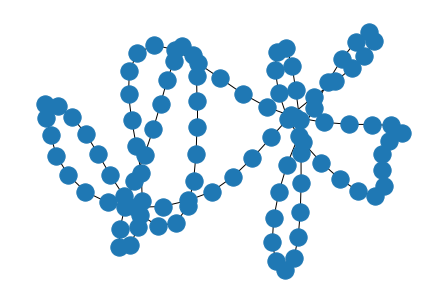

In [38]:
# eliminate subtours
while nx.number_connected_components(G) > 1:
    print('has subgraph')

    components=nx.connected_components(G)
    for c in components:
        #print(c)
        model+=lpSum(x[i, j] for i in c for j in c if i!=j) <= len(c)-1
        
    model.solve()
    routes.clear()
    for var in model.variables():
        if var.value() == 1:
            print(var.name, var.value())
            a=var.name.replace('_', '')
            routes.append(make_tuple(a[1:]))
    G=nx.Graph()
    G.add_nodes_from(range(n_point))
    for e in routes:
        G.add_edge(e[0], e[1])
            
print('no subgraph')
nx.draw(G)
print(model.objective.value())

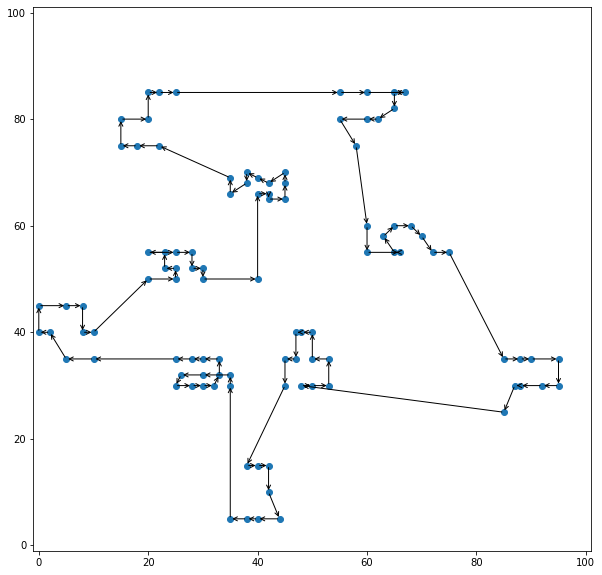

In [39]:
plt.figure(figsize=(10, 10))
plt.scatter(df_master['X_CORR'], df_master['Y_CORR'])
        
plt.xlim([-1, 101])
plt.ylim([-1, 101])

arrowprops=dict(arrowstyle='->')
for i, j in routes:
    #print(i, j, df_master.iloc[j][0], df_master.iloc[j][1])
    plt.annotate('', xy=[df_master.iloc[j]['X_CORR'], df_master.iloc[j]['Y_CORR']], xytext=[df_master.iloc[i]['X_CORR'], df_master.iloc[i]['Y_CORR']], arrowprops=arrowprops)

plt.show()